In [55]:
import wcs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

word_counts = {}
langs = [16]
# for lang in wcs.ALL_LANGS:
for lang in langs:
    print("building word count for lang ", lang)
    word_counts[lang] = wcs.build_word_count(lang)

building word count for lang  16


In [66]:
def build_simple_mle(word_count):
    mle = {}
    
    for chip in wcs.ALL_CHIPS:
        mle[chip] = np.argmax(word_count[:, chip-1])
        # print("Row data for chip {}".format(chip))
        # print(word_count[:, chip-1])
        # print("for chip {} got mle = {}".format(chip, mle[chip]))
    
    return mle
        
def simple_mle_grid(mles, lang):
    # plot the wcs grid with the mle estimate
    fig, ax = plt.subplots()
    num_cols = 41
    num_rows = len('ABCDEFGHIJ')
    X, Y = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    Z = np.zeros((num_rows, num_cols), dtype=int)
    no_mle_val = 0
   
    cmap_list = ['white', 'xkcd:light pink', 'xkcd:peach', 'xkcd:beige',
                 'xkcd:salmon', 'xkcd:lilac', 'xkcd:lavender',
                 'xkcd:tan', 'xkcd:puke green', 'xkcd:rose',
                 'xkcd:seafoam green', 'xkcd:mint green', 'xkcd:baby blue',
                 'xkcd:olive', 'xkcd:forest green', 'xkcd:deep blue',
                 'xkcd:purple blue', 'xkcd:chocolate', 'xkcd:charcoal']
    if len(np.unique(mles.values())) > len(cmap_list) - 1:
        print("ERROR: too many cats, cmap does not have enough colors")
        
    cmap = ListedColormap(cmap_list)
    
    for row in range(num_rows):
        for col in range(num_cols):
            if (row, col) in wcs.matrix_to_chipnum:
                # +1 to make no_mle_val always be white
                Z[row, col] = mles[wcs.matrix_to_chipnum[(row, col)]] + 1
            else:
                Z[row, col] = no_mle_val
                # print("using no_mle_val for col {} and row {}".format(col, row))
                                   
    ax.pcolormesh(X, Y, Z, shading='auto', edgecolors='black', cmap=cmap)
    ax.set_title('MLE Categories for Language {}'.format(lang))
    # ax.legend()

    fig.set_size_inches((32, 8))
    plt.show()
    # plt.savefig('lang{}_simpleMLEgrid.png'.format(language))

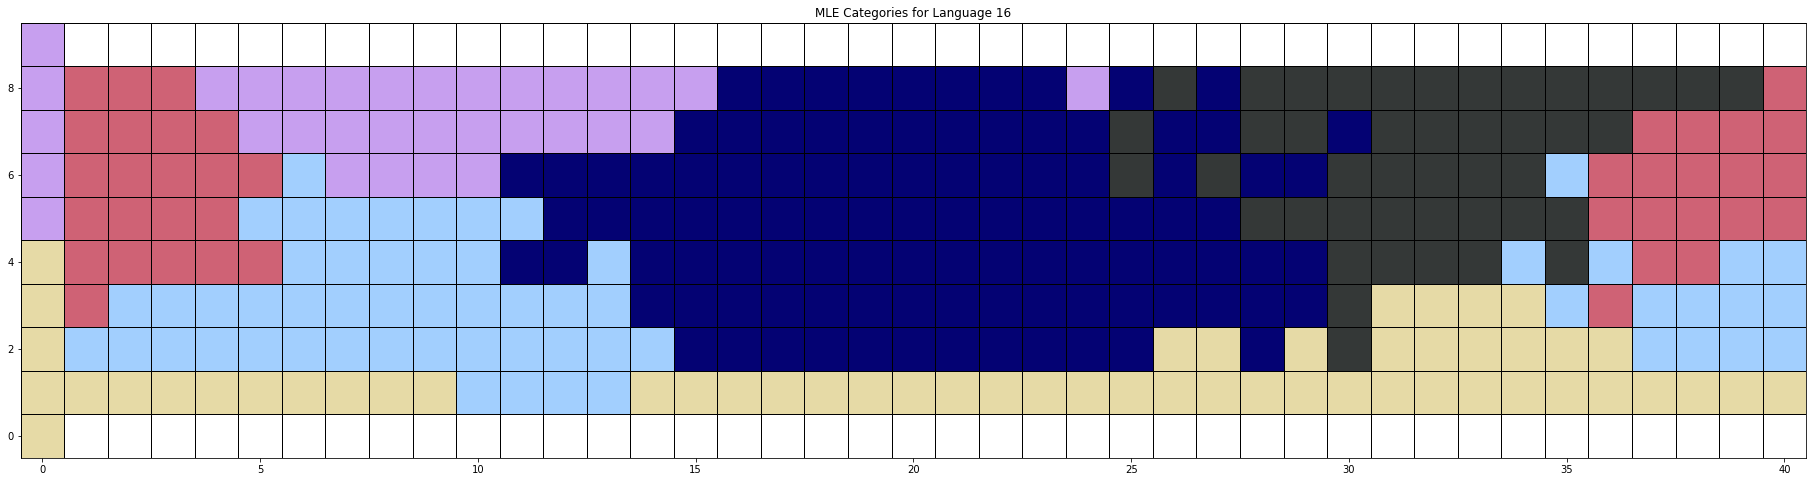

In [67]:
lang = 16
mles = build_simple_mle(word_counts[lang])
simple_mle_grid(mles, lang)